In [26]:
#extracting features of negatives and then plotted heatmap.
#difference in features of cvs with non cvs. Calculating highly correlated features for the difference heatmap.
#Taking the 10 pairs with the largest correlation and make feature 1 VS feature 2 plot for both samples in the same plot (different colors for positive/negative class).
#at least in a few of them  the points of the positive class are in the boundaries of the negative class.We can use anomaly detection. 
#importing useful python libraries
import pandas as pd
import light_curve as lc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
# Load your parquet file
df_neg = pd.read_csv("negatives_lightcurves_grouped_r_clean.parquet")

# Check shape and columns
print(df_neg.shape)
print(df_neg.columns)


(1471, 25)
Index(['object', 'oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags',
       'filtercode', 'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field',
       'ccdid', 'qid', 'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc',
       'exptime', 'airmass', 'programid'],
      dtype='object')


In [28]:
# Define extractor with all features
# definition of all extracted features is reported to my Overleaf file
extractor = lc.Extractor(
    lc.Mean(), #Mean magnitude
    lc.WeightedMean(),
    lc.StandardDeviation(),
    lc.Median(),
    lc.Amplitude(),
    lc.BeyondNStd(nstd=1),
    lc.Cusum(),
    lc.InterPercentileRange(0.10),
    lc.Kurtosis(),
    lc.LinearTrend(),
    lc.LinearFit(),   # slope, slope_sigma, reduced_chi2
    lc.MagnitudePercentageRatio(0.4, .05),
    lc.MagnitudePercentageRatio(0.2, 0.1),
    lc.MaximumSlope(),
    lc.MedianAbsoluteDeviation(),
    lc.MedianBufferRangePercentage(0.10),
    lc.PercentAmplitude(),
    lc.MeanVariance(),
    lc.AndersonDarlingNormal(),
    lc.ReducedChi2(),
    lc.Skew(),
    lc.StetsonK()
)

In [29]:
# Function to parse semicolon-separated arrays
def parse_array(x):
    return np.array([float(v) for v in str(x).split(";") if v != ""])
# Collect results
results = [] #empty array to store results
#Iterate through each row of the DataFrame (each row = one object) for negative objects
for _, row in df_neg.iterrows():
    try:
        t = parse_array(row["hjd"]) #time array for heleocentric julian date
        m = parse_array(row["mag"]) #magnitude column
        err = parse_array(row["magerr"]) #error
        feats = extractor(t, m, err, sorted=True, check=False)
        results.append([row["object"]] + list(feats))
    except Exception as e:
        print(f" Skipping {row['object']} due to error: {e}")

# Create DataFrame with proper headers
features_df = pd.DataFrame(results, columns=["object"] + extractor.names)

# Save to CSV and Excel
features_df.to_csv("negative_lightcurve_features_26.csv", index=False)
#features_df.to_excel("lightcurve_features_26.xlsx", index=False)
features_df.to_parquet("negative_lightcurve_features_26.parquet", index=False)
print(" negative_Feature extraction complete! Saved to:")
print("   - negative_lightcurve_features_26.csv")
#print("   - lightcurve_features_26.xlsx")
print("   - negative_lightcurve_features_26.parquet")

 negative_Feature extraction complete! Saved to:
   - negative_lightcurve_features_26.csv
   - negative_lightcurve_features_26.parquet


In [30]:
df_neg = pd.read_parquet("negative_lightcurve_features_26.parquet")
df_neg.head() # show first 5 rows

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,ZTF17aaatdnl,16.474019,16.265769,0.655889,16.159328,2.216342,0.108881,0.239616,1.121193,5.080193,...,0.476100,896.175436,0.054062,0.681265,3.304615,0.039814,241.291275,454.107709,2.385774,0.765791
1,ZTF18aaawejy,16.510358,16.406240,0.425248,16.273313,1.010284,0.195536,0.356777,1.111182,0.273401,...,0.593552,669.958263,0.060773,0.612500,1.315850,0.025756,259.973064,541.683306,1.310183,0.795163
2,ZTF18aaphvtk,17.344563,16.750839,0.729764,17.723148,1.856989,0.135151,0.299635,1.655165,3.076823,...,0.457040,596.780858,0.153105,0.516301,3.273998,0.042075,169.896297,2942.566563,-1.916860,0.796064
3,ZTF18aawadfc,14.772833,14.772367,0.083390,14.770324,0.325024,0.556935,0.343321,0.204603,-0.675172,...,0.912447,888.048458,0.088786,0.202914,0.456098,0.005645,66.631091,49.674484,0.147798,0.887305
4,ZTF18aawccls,17.244160,17.142604,0.398646,17.278309,1.159980,0.431990,0.212555,1.089173,-0.760558,...,0.771138,519.031189,0.326796,0.287154,1.180918,0.023118,13.502721,328.469899,-0.108506,0.824070


In [31]:
# Assuming first column is object and dropping the non numeric entry
features_neg = df_neg.drop(columns=['object'])


In [32]:
features_neg

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,16.474019,16.265769,0.655889,16.159328,2.216342,0.108881,0.239616,1.121193,5.080193,-0.000384,...,0.476100,896.175436,0.054062,0.681265,3.304615,0.039814,241.291275,454.107709,2.385774,0.765791
1,16.510358,16.406240,0.425248,16.273313,1.010284,0.195536,0.356777,1.111182,0.273401,0.000278,...,0.593552,669.958263,0.060773,0.612500,1.315850,0.025756,259.973064,541.683306,1.310183,0.795163
2,17.344563,16.750839,0.729764,17.723148,1.856989,0.135151,0.299635,1.655165,3.076823,0.000231,...,0.457040,596.780858,0.153105,0.516301,3.273998,0.042075,169.896297,2942.566563,-1.916860,0.796064
3,14.772833,14.772367,0.083390,14.770324,0.325024,0.556935,0.343321,0.204603,-0.675172,0.000060,...,0.912447,888.048458,0.088786,0.202914,0.456098,0.005645,66.631091,49.674484,0.147798,0.887305
4,17.244160,17.142604,0.398646,17.278309,1.159980,0.431990,0.212555,1.089173,-0.760558,-0.000026,...,0.771138,519.031189,0.326796,0.287154,1.180918,0.023118,13.502721,328.469899,-0.108506,0.824070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,16.654061,16.651763,0.078853,16.664974,0.399733,0.314956,0.364285,0.193176,0.520959,0.000062,...,0.767738,335.216219,0.059408,0.280022,0.533226,0.004735,31.846293,15.583201,-0.274010,0.841964
1467,15.672581,15.664374,0.203161,15.629044,0.554236,0.506274,0.385983,0.512150,-1.164869,0.000149,...,0.816458,287.392110,0.185408,0.213857,0.662415,0.012963,59.871746,125.542405,-0.046043,0.869043
1468,16.171780,16.166272,0.142373,16.176975,0.586526,0.268791,0.184090,0.350670,1.280258,0.000010,...,0.537875,491.297072,0.053593,0.511726,0.594362,0.008804,32.393939,54.299823,-0.218692,0.691085
1469,16.285811,16.279300,0.135786,16.318378,0.903792,0.251357,0.251233,0.308055,6.857478,0.000036,...,0.602996,847.689328,0.054186,0.615092,1.378195,0.008338,41.680390,58.524971,0.347693,0.771556


In [33]:
#correlation matrix calculation
corr_neg = features_neg.corr()


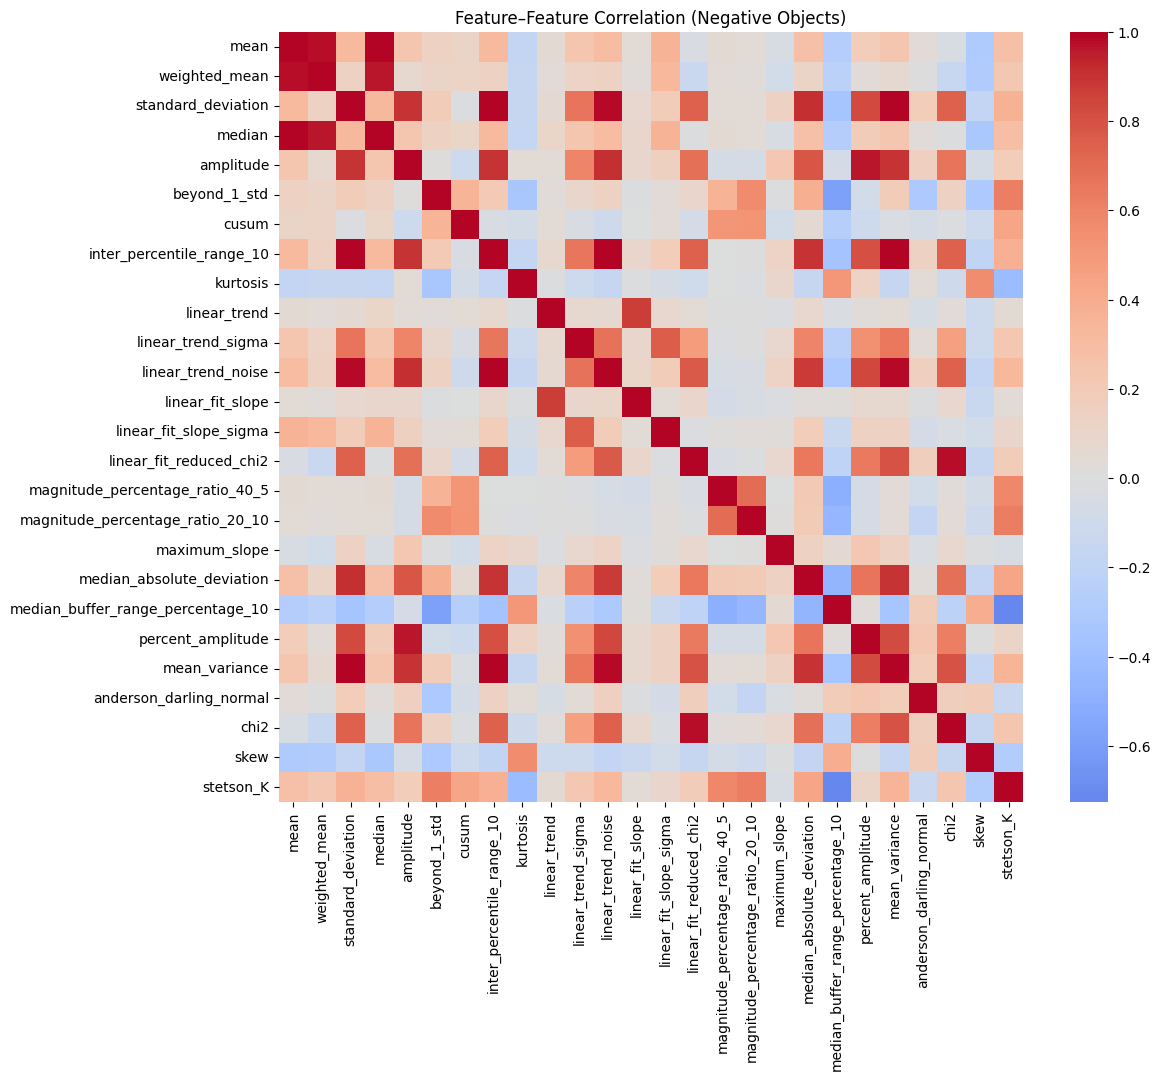

In [34]:
#plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_neg, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (Negative Objects)')
#plt.tight_layout()
plt.show()


In [46]:
# Compute correlation matrix
corr_neg = features_neg.corr()

# Convert to long format
#corr_pairs = corr_neg.unstack().sort_values(ascending=False)

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs < 0.9999]

# Select high correlations
high_corr = corr_pairs[abs(corr_pairs) > 0.7]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
mean_variance                      standard_deviation           0.993464
inter_percentile_range_10          standard_deviation           0.992692
mean                               median                       0.991118
inter_percentile_range_10          linear_trend_noise           0.986879
                                   mean_variance                0.986876
linear_trend_noise                 standard_deviation           0.986045
                                   mean_variance                0.981249
mean                               weighted_mean                0.977146
chi2                               linear_fit_reduced_chi2      0.977141
median                             weighted_mean                0.964767
amplitude                          percent_amplitude            0.960709
median_absolute_deviation          standard_deviation           0.908774
amplitude                          linear_trend_noise           0.905907
mean_variance     

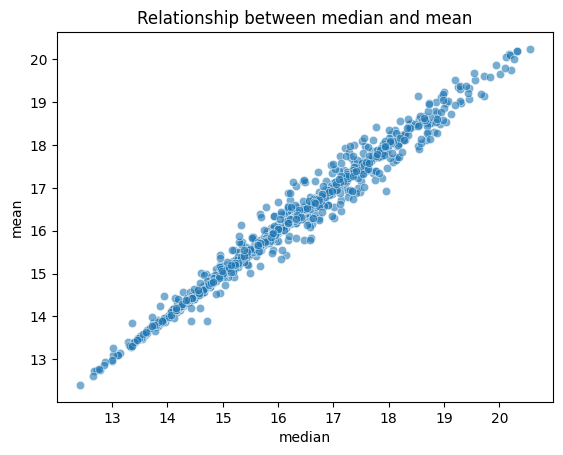

In [47]:
# Example: plot two correlated features
x_feature = 'median'
y_feature = 'mean'

sns.scatterplot(data=features_neg, x=x_feature, y=y_feature, alpha=0.6)
plt.title(f'Relationship between {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


In [40]:
# Load your parquet file with positives
df_pos= pd.read_csv("lightcurve_features_26.csv")


In [41]:
#numeric transition
features_pos = df_pos.drop(columns=['object'])


In [43]:
#correlation calculation
corr_pos = features_pos.corr()

In [48]:
# Drop self-correlations of positives (exactly 1.0)
corr_pairs = corr_pairs[corr_pairs < 0.9999]

# Keep only unique pairs: since unstack produces both (A,B) and (B,A), select only one
# Method: keep pairs where feature_i < feature_j (lexicographic) or use where index[0] != index[1] and drop duplicates
corr_pairs = corr_pairs[ [i < j for i, j in corr_pairs.index] ]

# Select strong correlations (absolute correlation > 0.7)
high_corr = corr_pairs[abs(corr_pairs) > 0.7]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
mean_variance                      standard_deviation           0.993464
inter_percentile_range_10          standard_deviation           0.992692
mean                               median                       0.991118
inter_percentile_range_10          linear_trend_noise           0.986879
                                   mean_variance                0.986876
linear_trend_noise                 standard_deviation           0.986045
                                   mean_variance                0.981249
mean                               weighted_mean                0.977146
chi2                               linear_fit_reduced_chi2      0.977141
median                             weighted_mean                0.964767
amplitude                          percent_amplitude            0.960709
median_absolute_deviation          standard_deviation           0.908774
amplitude                          linear_trend_noise           0.905907
mean_variance     

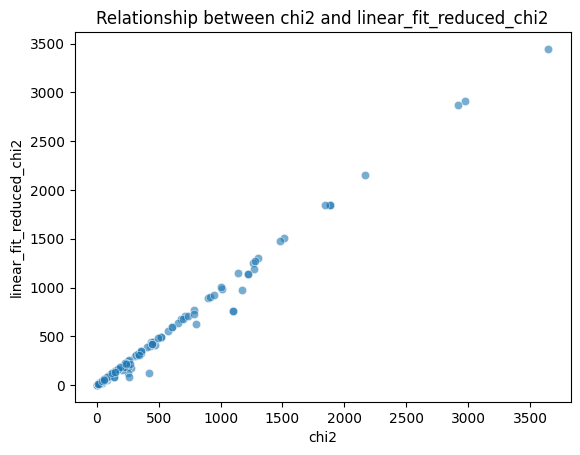

In [50]:

# Example: plot two correlated features
x_feature = 'chi2'
y_feature = 'linear_fit_reduced_chi2'

sns.scatterplot(data=features_pos, x=x_feature, y=y_feature, alpha=0.6)
plt.title(f'Relationship between {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

In [51]:
# corr_cv and corr_neg are correlation matrices
corr_diff = corr_pos - corr_neg


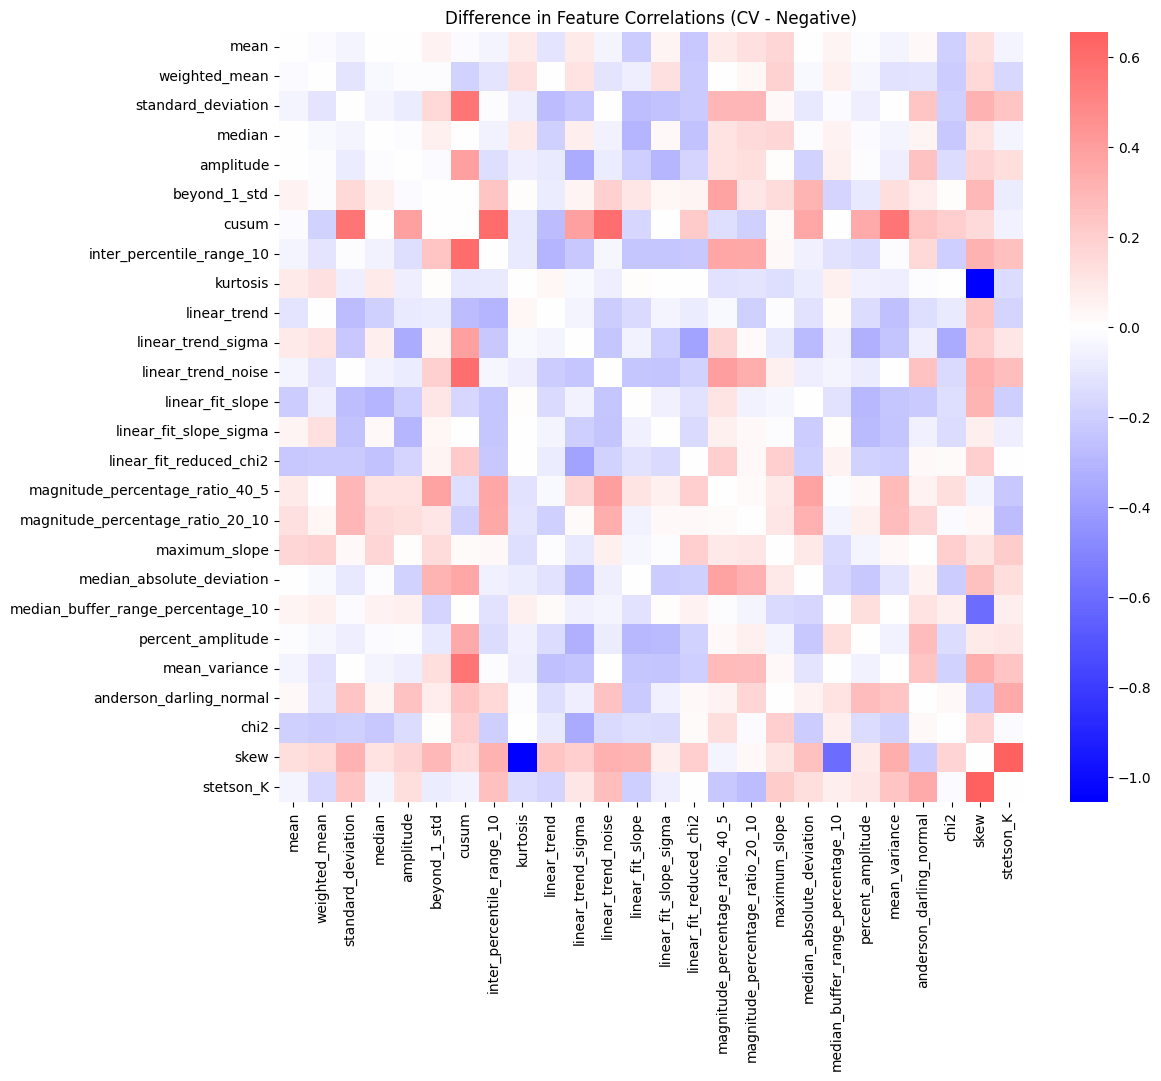

In [54]:
#difference between correlation f pos and neg
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (CV - Negative)')
#plt.tight_layout()
plt.show()


In [56]:
#  Convert to long (pairwise) format
#corr_diff_pairs = corr_diff.unstack()

#  Drop self-correlations (feature vs itself)
corr_diff_pairs = corr_diff_pairs[corr_diff_pairs.index.get_level_values(0) != corr_diff_pairs.index.get_level_values(1)]

#  Keep only one of (A,B) and (B,A) pairs to avoid duplication
corr_diff_pairs = corr_diff_pairs[ [i < j for i, j in corr_diff_pairs.index] ]

#  Sort by absolute difference
corr_diff_pairs = corr_diff_pairs.reindex(corr_diff_pairs.abs().sort_values(ascending=False).index)

#  Select feature pairs with large correlation difference
# e.g., absolute difference > 0.5, 0.5 because halfway diff is taken
high_corr_diff = corr_diff_pairs[abs(corr_diff_pairs) > 0.5]

print("Feature pairs with largest correlation difference between positive and negative sets:")
print(high_corr_diff)


Feature pairs with largest correlation difference between positive and negative sets:
kurtosis                           skew                        -1.055600
skew                               stetson_K                    0.655793
median_buffer_range_percentage_10  skew                        -0.603718
cusum                              inter_percentile_range_10    0.603159
                                   linear_trend_noise           0.589432
                                   mean_variance                0.572775
                                   standard_deviation           0.572118
dtype: float64


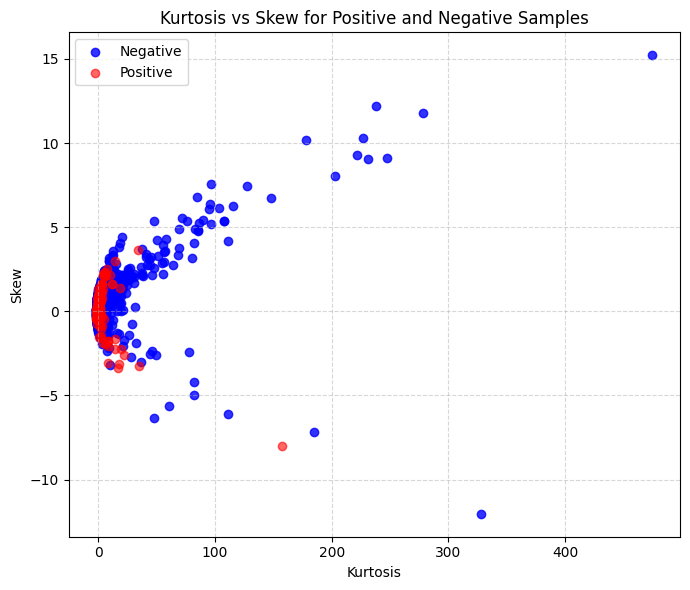

In [59]:
#skew and kurtosis
plt.figure(figsize=(7, 6))
# Plot negatives
plt.scatter(features_neg['kurtosis'], features_neg['skew'],
            color='blue', alpha=0.8, label='Negative')

# Plot positives
plt.scatter(features_pos['kurtosis'], features_pos['skew'],
            color='red', alpha=0.6, label='Positive')



plt.xlabel('Kurtosis')
plt.ylabel('Skew')
plt.title('Kurtosis vs Skew for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


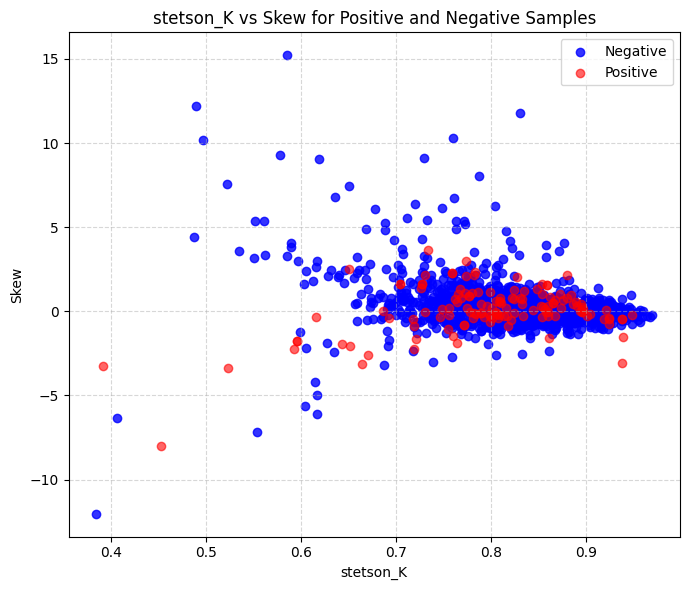

In [60]:
#skew and stetson_k

plt.figure(figsize=(7, 6))
# Plot negatives
plt.scatter(features_neg['stetson_K'], features_neg['skew'],
            color='blue', alpha=0.8, label='Negative')

# Plot positives
plt.scatter(features_pos['stetson_K'], features_pos['skew'],
            color='red', alpha=0.6, label='Positive')



plt.xlabel('stetson_K')
plt.ylabel('Skew')
plt.title('stetson_K vs Skew for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


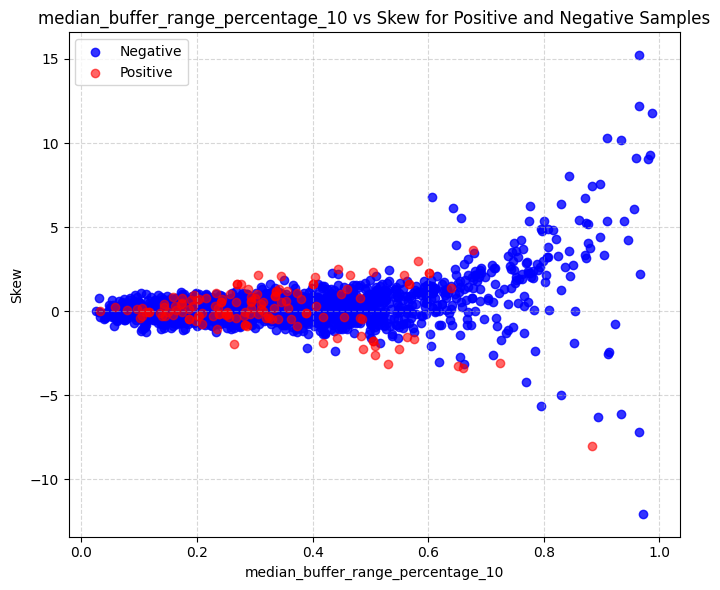

In [62]:

#median_buffer_range_percentage_10 and skew
plt.figure(figsize=(7, 6))
# Plot negatives
plt.scatter(features_neg['median_buffer_range_percentage_10'], features_neg['skew'],
            color='blue', alpha=0.8, label='Negative')
# Plot positives
plt.scatter(features_pos['median_buffer_range_percentage_10'], features_pos['skew'],
            color='red', alpha=0.6, label='Positive')



plt.xlabel('median_buffer_range_percentage_10')
plt.ylabel('Skew')
plt.title('median_buffer_range_percentage_10 vs Skew for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

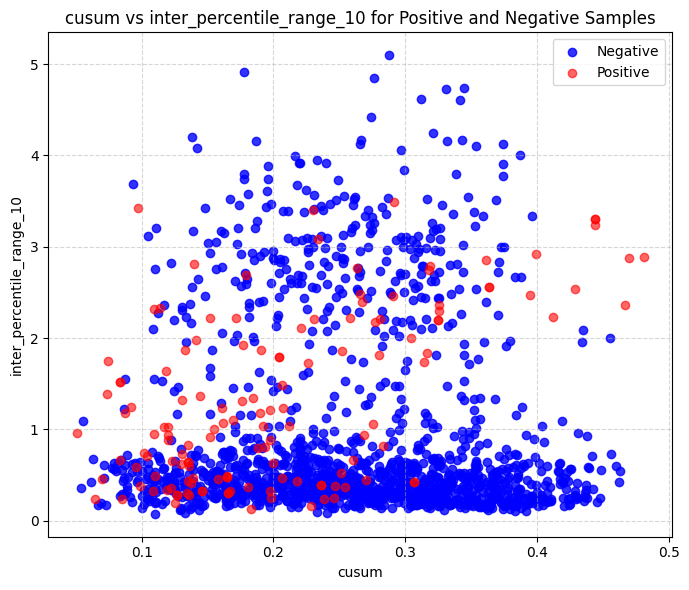

In [63]:
#cumulative sum & inter_percentile_range_10

plt.figure(figsize=(7, 6))
# Plot negatives
plt.scatter(features_neg['cusum'], features_neg['inter_percentile_range_10'],
            color='blue', alpha=0.8, label='Negative')
# Plot positives
plt.scatter(features_pos['cusum'], features_pos['inter_percentile_range_10'],
            color='red', alpha=0.6, label='Positive')



plt.xlabel('cusum')
plt.ylabel('inter_percentile_range_10')
plt.title('cusum vs inter_percentile_range_10 for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

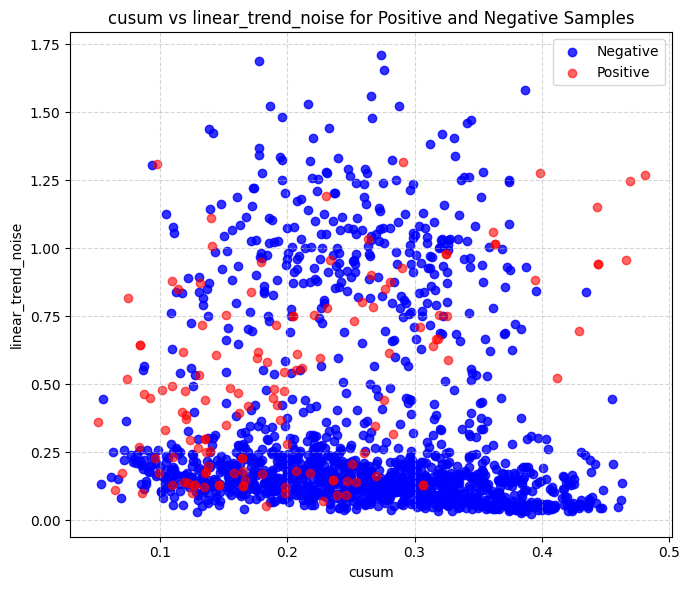

In [64]:
#cumulative sum and linear trend noise
plt.figure(figsize=(7, 6))

# Plot negatives
plt.scatter(features_neg['cusum'], features_neg['linear_trend_noise'],
            color='blue', alpha=0.8, label='Negative')

# Plot positives
plt.scatter(features_pos['cusum'], features_pos['linear_trend_noise'],
            color='red', alpha=0.6, label='Positive')



plt.xlabel('cusum')
plt.ylabel('linear_trend_noise')
plt.title('cusum vs linear_trend_noise for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

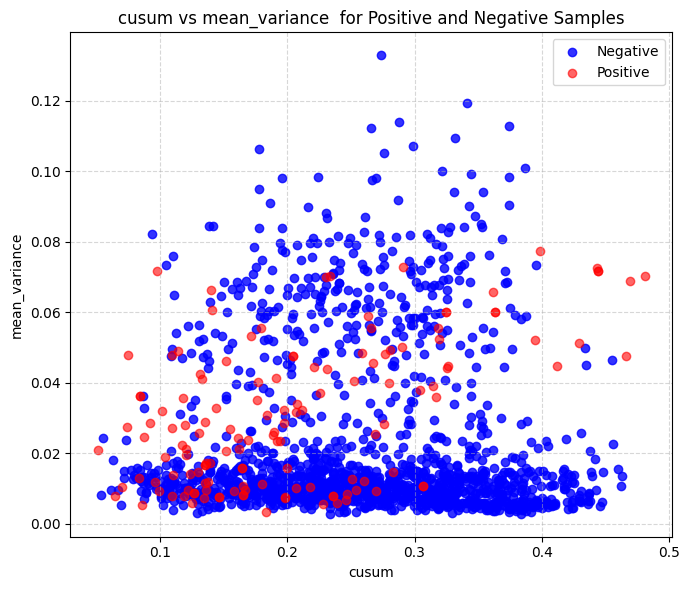

In [65]:
#cumulative sum and mean varience

plt.figure(figsize=(7, 6))

# Plot negatives
plt.scatter(features_neg['cusum'], features_neg['mean_variance'],
            color='blue', alpha=0.8, label='Negative')


# Plot positives
plt.scatter(features_pos['cusum'], features_pos['mean_variance'],
            color='red', alpha=0.6, label='Positive')


plt.xlabel('cusum')
plt.ylabel('mean_variance')
plt.title('cusum vs mean_variance  for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#cumulative sum & standard deviation
plt.figure(figsize=(7, 6))

# Plot negatives
plt.scatter(features_neg['cusum'], features_neg['standard_deviation'],
            color='blue', alpha=0.8, label='Negative')
# Plot positives
plt.scatter(features_pos['cusum'], features_pos_numeric['standard_deviation'],
            color='red', alpha=0.6, label='Positive')



plt.xlabel('cusum')
plt.ylabel('standard_deviation')
plt.title('cusum vsstandard_deviation  for Positive and Negative Samples')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()